In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
import scienceplots
import seaborn as sns
warnings.filterwarnings('ignore')



# Load the dataset

df = pd.read_csv("/home/aritra_saha/Desktop/Python_1_week/database.csv")

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distan

In [36]:
# Data Cleaning
# Convert Date and Time to datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df = df.dropna(subset=['DateTime'])  # Drop rows with invalid datetime
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,DateTime
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28 08:22:12
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28 09:13:47
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28 12:38:51
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016-12-29 22:30:19


In [37]:
# Statistical Analysis
print("\nStatistical Summary:")
print(df[['Magnitude', 'Depth']].describe())


Statistical Summary:
          Magnitude         Depth
count  23409.000000  23409.000000
mean       5.882558     70.748526
std        0.423084    122.605748
min        5.500000     -1.100000
25%        5.600000     14.530000
50%        5.700000     33.000000
75%        6.000000     54.000000
max        9.100000    700.000000


In [38]:
# Correlation Analysis
correlation = df[['Magnitude', 'Depth']].corr()
print("\nCorrelation Matrix:")
print(correlation)



Correlation Matrix:
           Magnitude     Depth
Magnitude   1.000000  0.023584
Depth       0.023584  1.000000


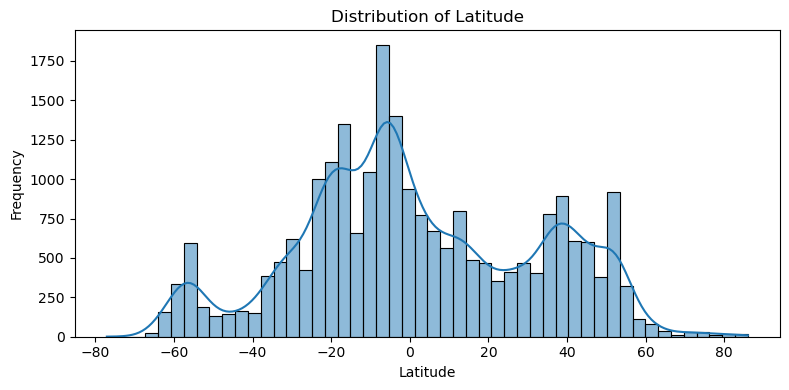

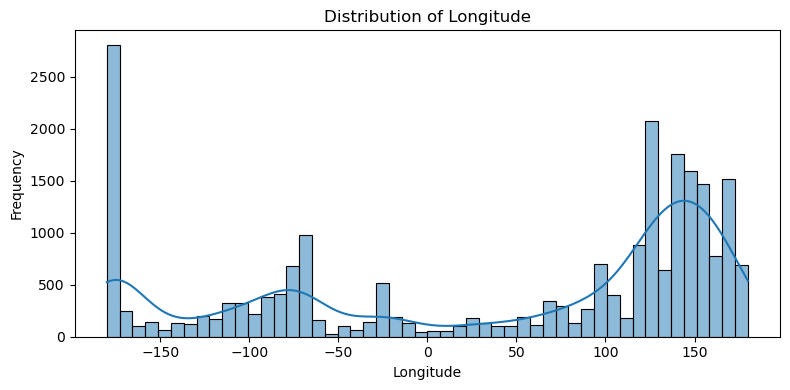

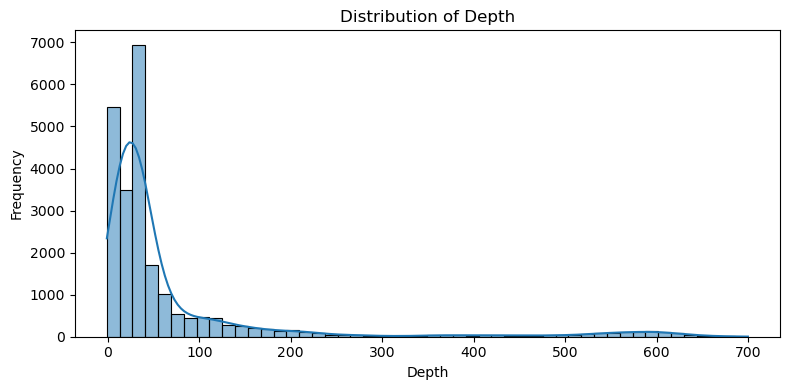

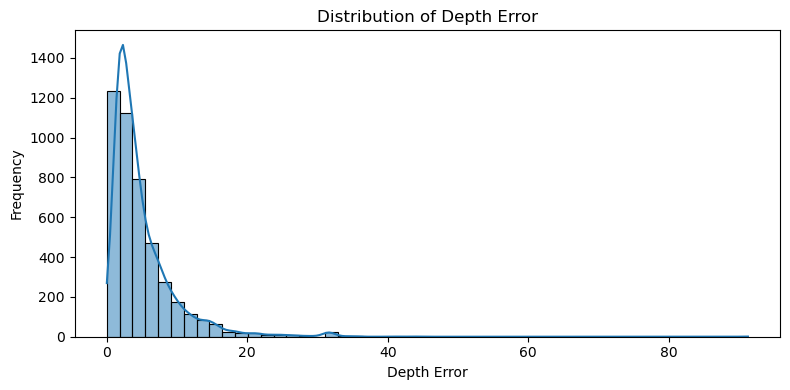

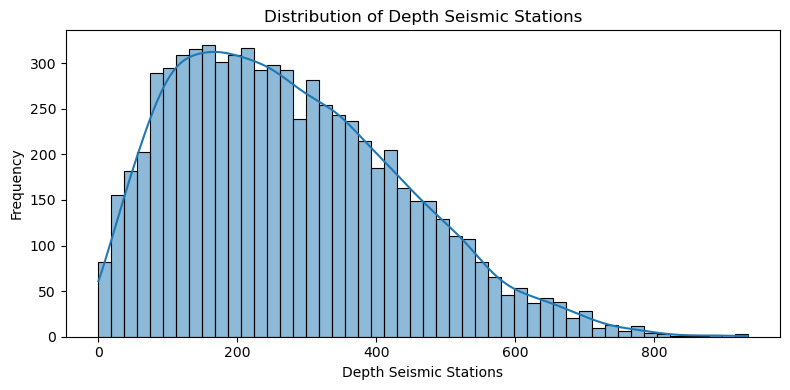

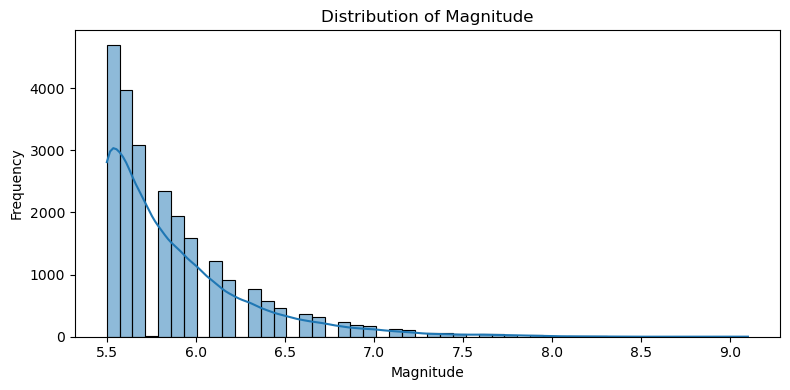

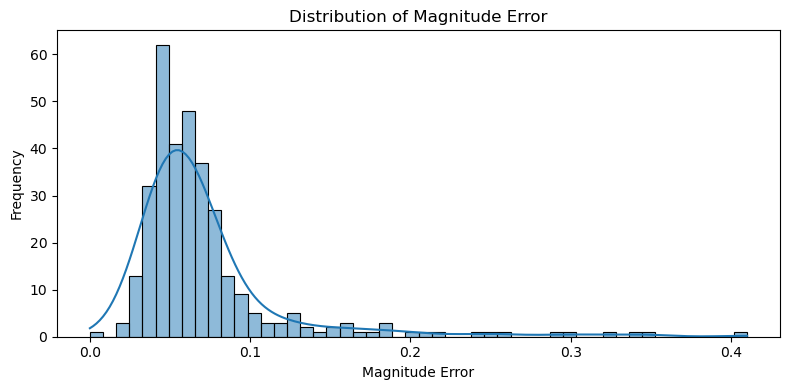

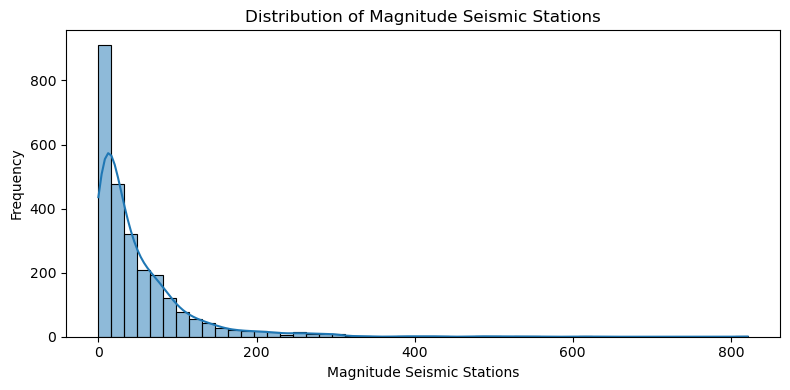

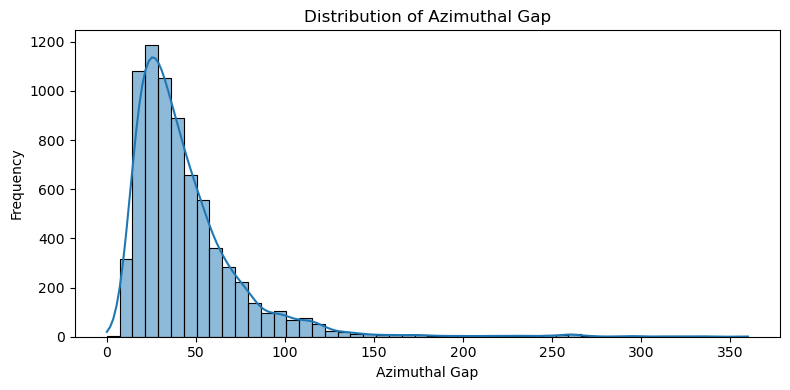

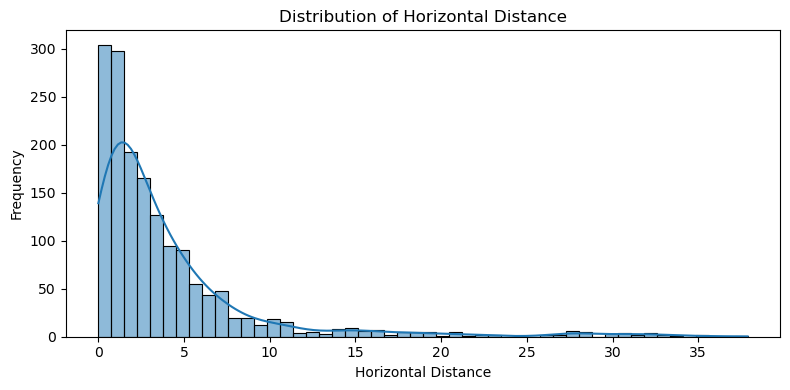

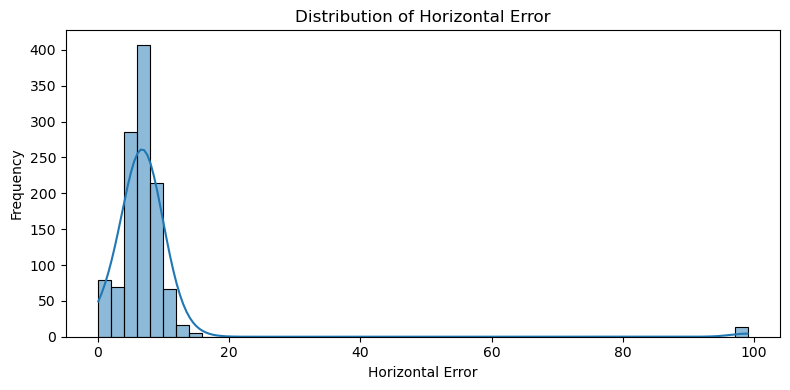

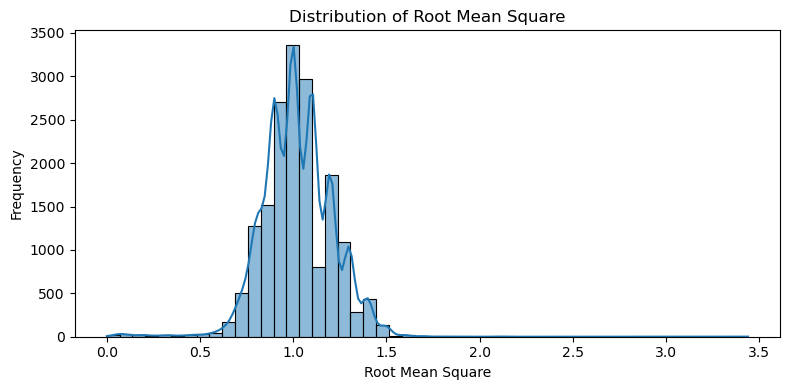

In [39]:
# === 2. HISTOGRAMS & DISTRIBUTIONS ===
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

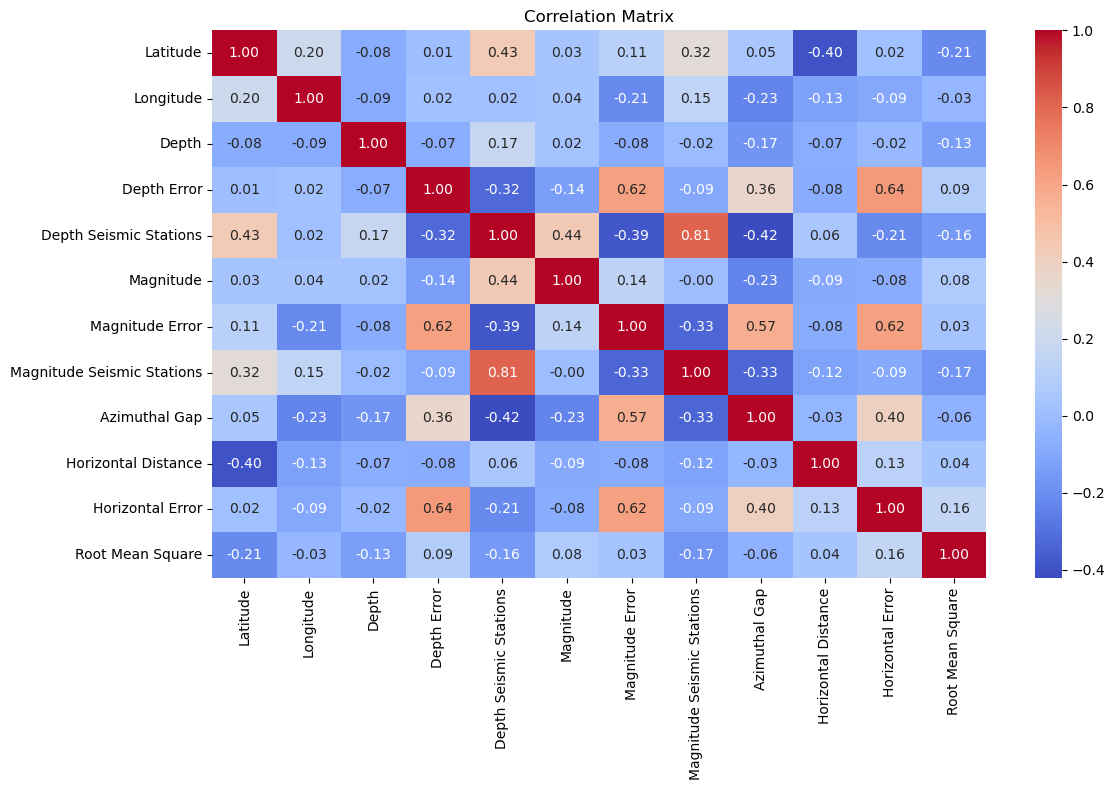

In [40]:
# === 4. CORRELATION MATRIX PLOT===
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [41]:
# Extract year for temporal analysis
df['Year'] = df['DateTime'].dt.year

In [42]:
# Temporal Analysis
earthquakes_per_year = df.groupby('Year').size()
magnitude_trend = df.groupby('Year')['Magnitude'].mean()

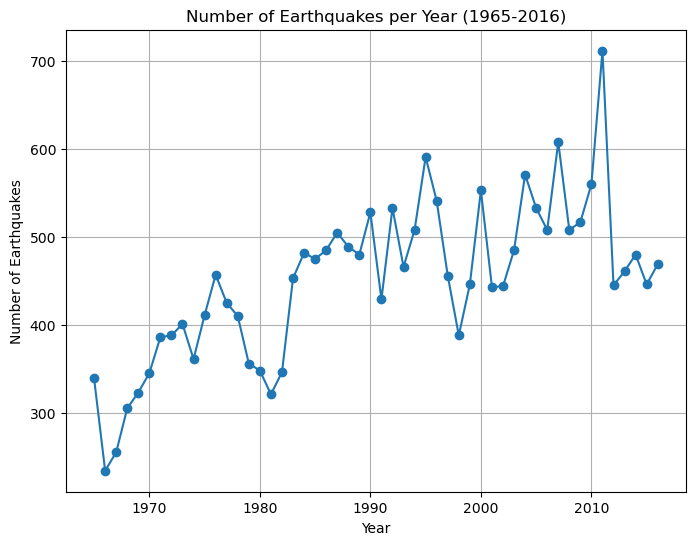

In [43]:
# Visualization 1: Earthquake Frequency Over Time
plt.figure(figsize=(8, 6))
earthquakes_per_year.plot(kind='line', marker='o')
plt.title('Number of Earthquakes per Year (1965-2016)')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

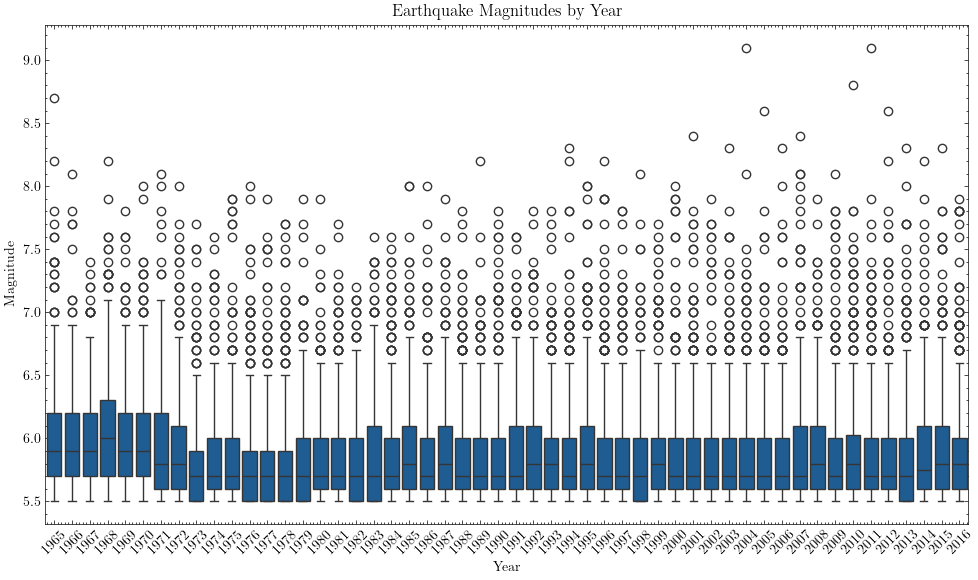

In [46]:
# Visualization 4: Boxplot of Magnitudes by Year

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Magnitude', data=df)
plt.title('Earthquake Magnitudes by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



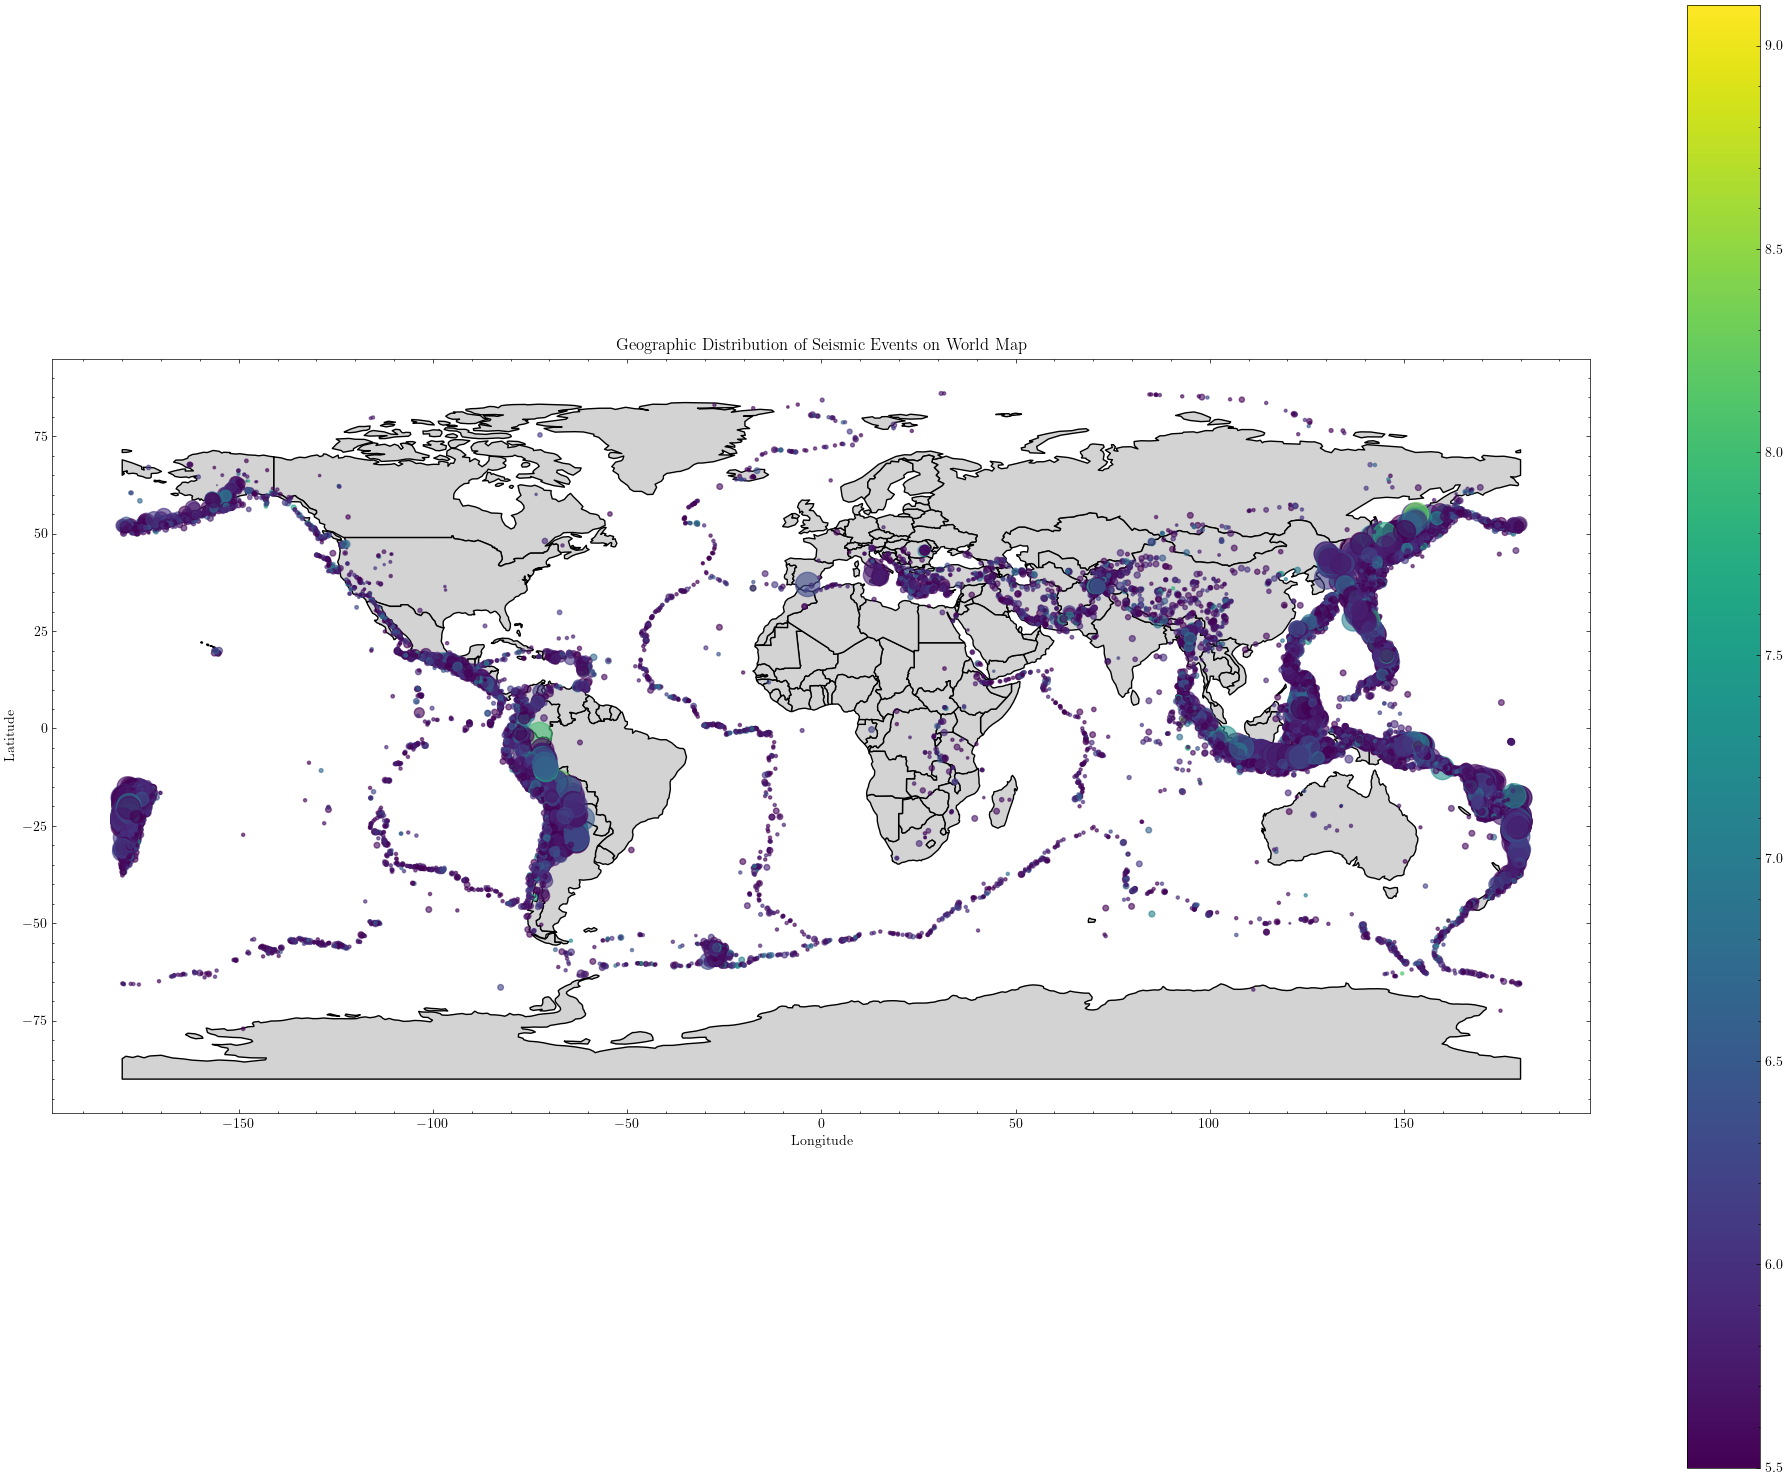

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load world map from GeoPandas' built-in dataset
world = gpd.read_file("world_data/ne_110m_admin_0_countries.shp") #for this an external shapefile is needed downloaded externaly.


# Create a GeoDataFrame from seismic data
gdf = gpd.GeoDataFrame(
    df.dropna(subset=['Latitude', 'Longitude']),
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
    crs="EPSG:4326"
)

# Plot
fig, ax = plt.subplots(figsize=(20, 15))
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot seismic events
gdf.plot(
    ax=ax,
    column='Magnitude',
    cmap='viridis',
    markersize=gdf['Depth'].fillna(1) * 0.5,
    legend=True,
    alpha=0.6
)

plt.title("Geographic Distribution of Seismic Events on World Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()



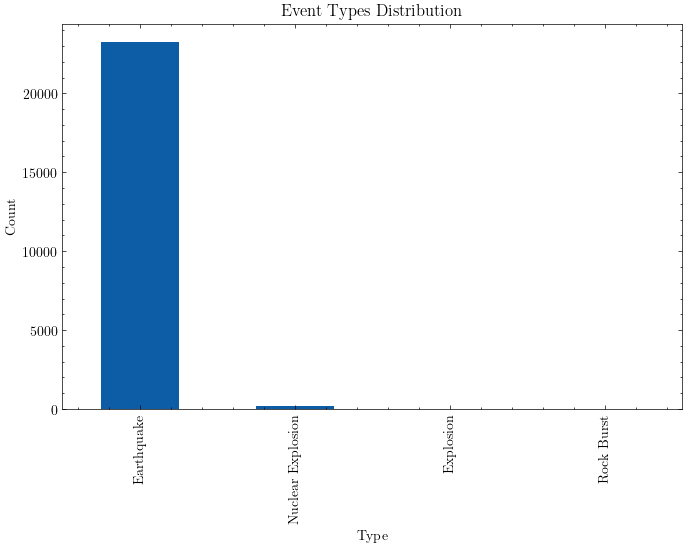

In [49]:
# === 7. EVENT TYPE ANALYSIS ===
plt.figure(figsize=(8, 5))
df['Type'].value_counts().plot(kind='bar')
plt.title("Event Types Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
# plt.tight_layout()
plt.show()


In [50]:
# Additional Analysis: Magnitude Categories
df['Magnitude_Category'] = pd.cut(df['Magnitude'],
                               bins=[5.5, 6, 7, 8, 10],
                               labels=['Moderate', 'Strong', 'Major', 'Great'])
magnitude_counts = df['Magnitude_Category'].value_counts()


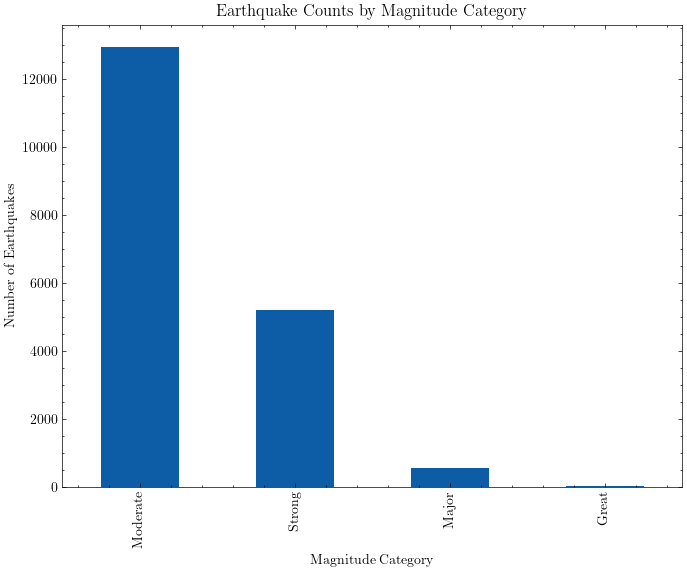

In [51]:
# Visualization 5: Magnitude Categories
plt.figure(figsize=(8, 6))
magnitude_counts.plot(kind='bar')
plt.title('Earthquake Counts by Magnitude Category')
plt.xlabel('Magnitude Category')
plt.ylabel('Number of Earthquakes')
plt.show()

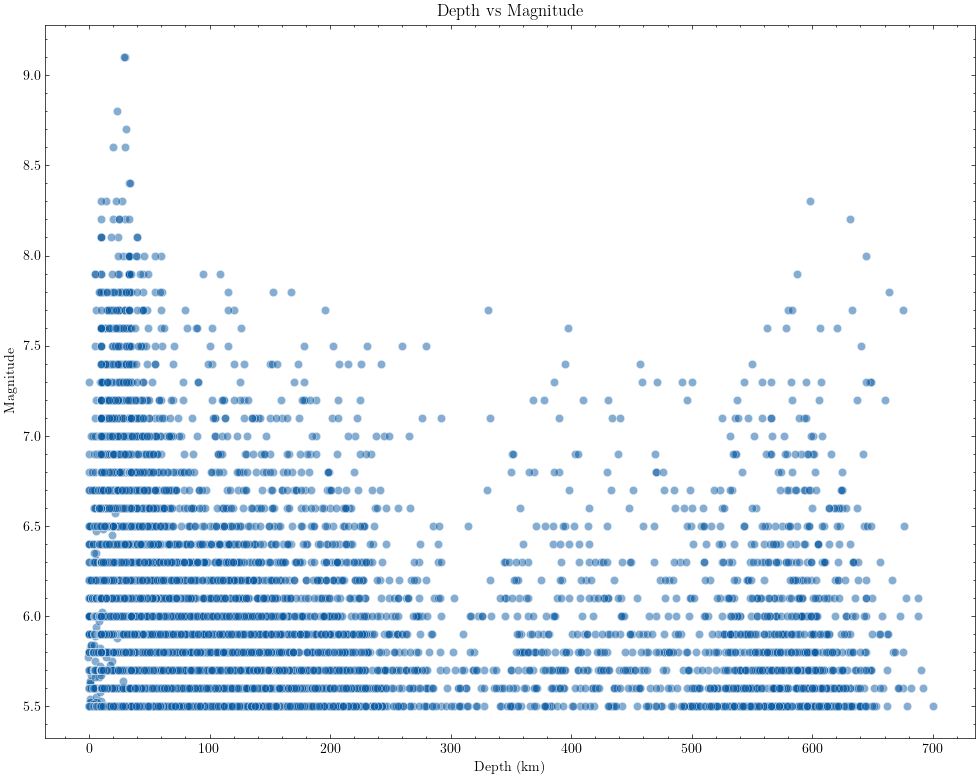

In [53]:
# === 10. DEPTH VS. MAGNITUDE ===
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Depth", y="Magnitude", alpha=0.5)
plt.title("Depth vs Magnitude")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()

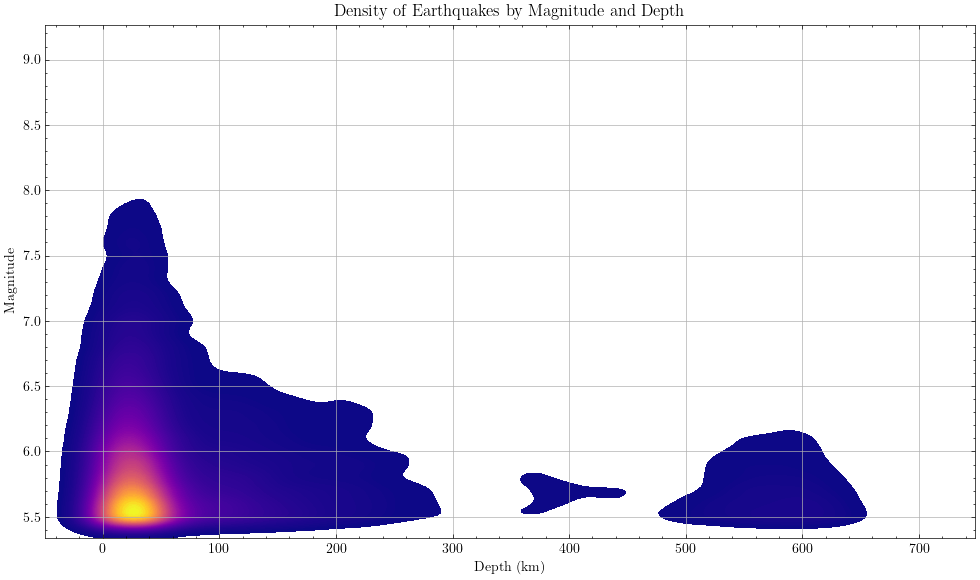

In [55]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    y="Magnitude", x="Depth",
    fill=True, cmap="plasma", bw_adjust=0.7, levels=100
)
plt.title("Density of Earthquakes by Magnitude and Depth")
plt.ylabel("Magnitude")
plt.xlabel("Depth (km)")
plt.grid(True)


#plt.colorbar(label="Density")

plt.tight_layout()
plt.show()

In [ ]:
#Key Insights from the analysis
# 1. Total number of earthquakes
# 2. Average magnitude
# 3. Median depth
# 4. Year with most earthquakes
# 5. Correlation between magnitude and depth
print("\nKey Insights:")
print(f"1. Total number of earthquakes: {len(df)}")
print(f"2. Average magnitude: {df['Magnitude'].mean():.2f}")
print(f"3. Median depth: {df['Depth'].median():.2f} km")
print(f"4. Year with most earthquakes: {earthquakes_per_year.idxmax()} ({earthquakes_per_year.max()} events)")
print(f"5. Correlation between magnitude and depth: {correlation.loc['Magnitude', 'Depth']:.3f}")


Key Insights:
1. Total number of earthquakes: 23409
2. Average magnitude: 5.88
3. Median depth: 33.00 km
4. Year with most earthquakes: 2011 (712 events)
5. Correlation between magnitude and depth: 0.024


## Key Insights:
### 1. Total number of earthquakes: 23409
### 2. Average magnitude: 5.88
### 3. Median depth: 33.00 km
### 4. Year with most earthquakes: 2011 (712 events)
### 5. Correlation between magnitude and depth: 0.024

In [57]:
# Geographic Analysis (Top 5 regions by earthquake frequency)
top_regions = df['Location Source'].value_counts().head(5)
print("\nTop 5 Regions by Earthquake Frequency:")
print(top_regions)


Top 5 Regions by Earthquake Frequency:
Location Source
US        20347
ISCGEM     2581
CI           61
GCMT         56
NC           54
Name: count, dtype: int64


## Top 5 Regions by Earthquake Frequency:
### Location Source
 US         20347
 
 ISCGEM         2581
 
 CI             61
 
 GCMT           56
 
 NC             54

# INSIGHT 1

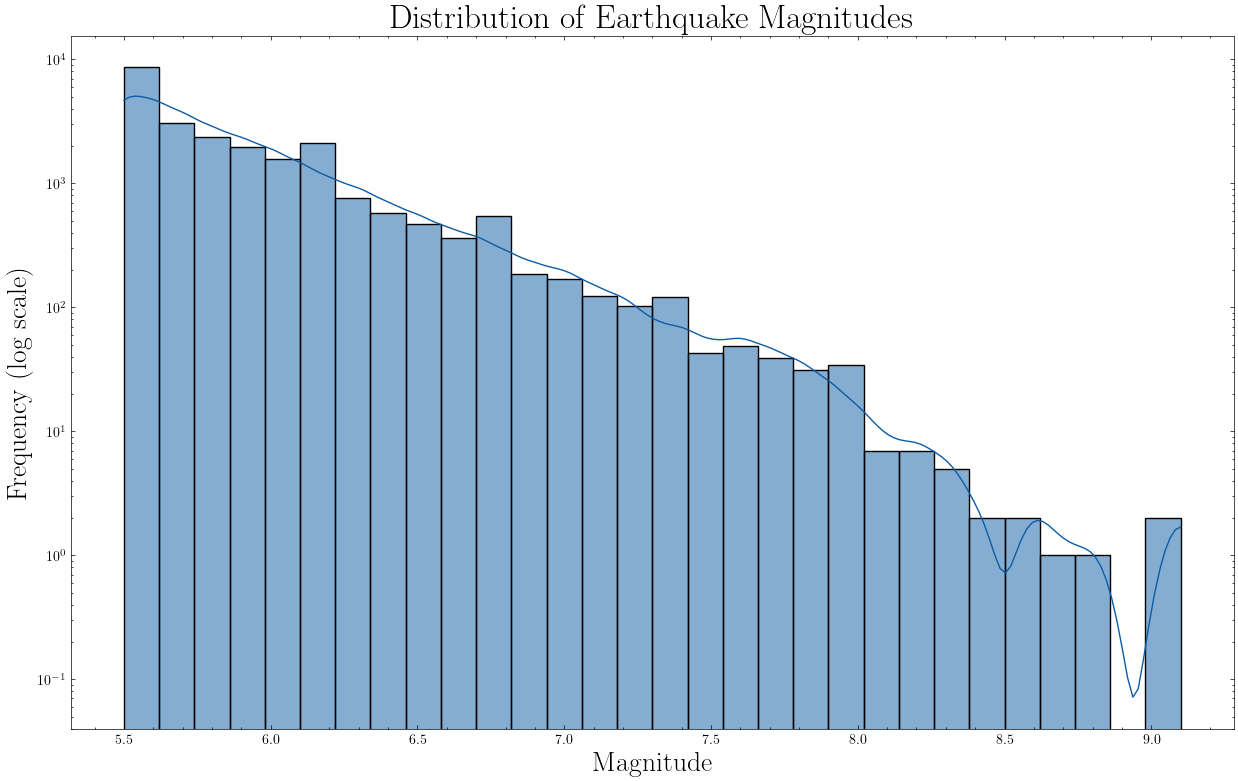

In [78]:
#Insight 1: Earthquake Magnitude Distribution Follows the Gutenberg-Richter Law
# Plot magnitude distribution
plt.figure(figsize=(15, 9))
sns.histplot(df['Magnitude'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes', fontsize=24)
plt.xlabel('Magnitude', fontsize=20)
plt.ylabel('Frequency (log scale)', fontsize=20)
plt.yscale('log')  # Log scale to see the exponential relationship
plt.show()

# Calculate log frequency
magnitude_counts = df['Magnitude'].value_counts().sort_index()
log_freq = np.log10(magnitude_counts)

# Linear regression to show the relationship
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(magnitude_counts.index, log_freq)



Gutenberg-Richter relationship holds with slope (b-value): -0.02
The Gutenberg-Richter law is a fundamental empirical relationship in seismology that describes the frequency of earthquakes relative to their magnitude. It is usually written as:

$\log_{10}N=a-bM$

N: Number of earthquakes with magnitude ≥ M 

a: Sciensmic activity constant

b: the slope of the line----Indicates the relative likelihood of small vs large earthquakes




In [ ]:
#computing the b-value from the Gutenberg-Richter law
# Gutenberg-Richter Law: log10(N) = a - bM
import numpy as np
from scipy.stats import linregress

# Compute the frequency-magnitude distribution
magnitudes = df['Magnitude'].dropna()
bins = np.arange(magnitudes.min(), magnitudes.max() + 0.1, 0.1)
hist, bin_edges = np.histogram(magnitudes, bins=bins)
cum_counts = np.cumsum(hist[::-1])[::-1]  # Cumulative from largest to smallest

# Only consider bins with non-zero counts
valid = cum_counts > 0
M = bin_edges[:-1][valid]
N = np.log10(cum_counts[valid])

# Fit linear model: log(N) = a - bM
slope, intercept, r_value, p_value, std_err = linregress(M, N)
b_value = -slope  # because slope is negative of b

print(f"b-value = {b_value:.2f}")

b-value = 1.24


Typical values: b ≈ 1 for tectonic earthquakes globally

Higher b (e.g., 1.2–1.5): More small earthquakes relative to large ones — often found in volcanic or swarm zones.

Lower b (e.g., 0.5–0.8): More large earthquakes relative to small ones — common in subduction zones or high-stress areas.

# INSIGHT 2

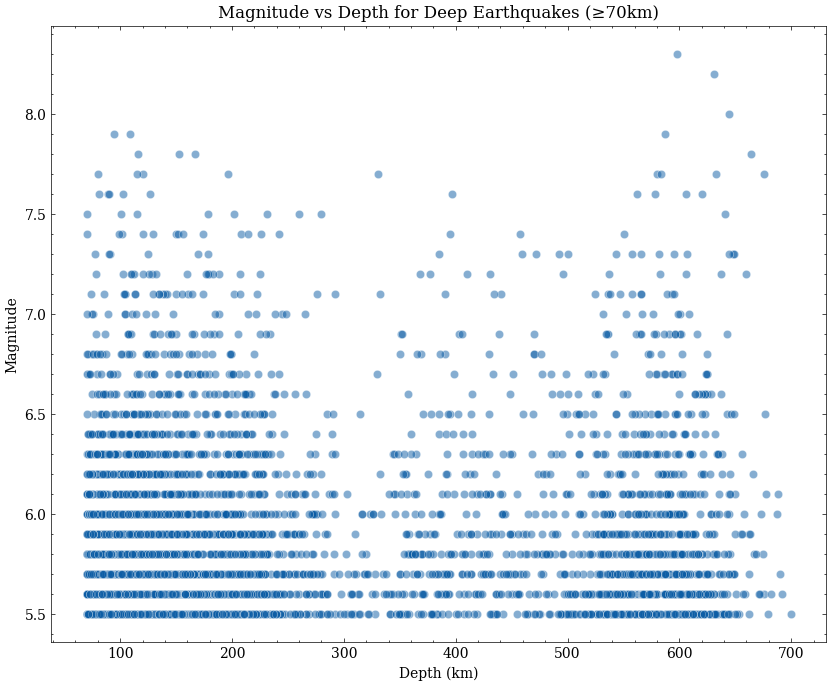

Pearson correlation between depth and magnitude for deep quakes: 0.09


In [ ]:
# Insight 2: Significant Depth-Magnitude Relationship in Subduction Zones
# Focus on deep earthquakes (≥70km, which are typically subduction zone earthquakes)
#%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False  # Disable LaTeX if it's causing issues


deep_quakes = df[df['Depth'] >= 70]

# Plot depth vs magnitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Depth', y='Magnitude', data=deep_quakes, alpha=0.5)
plt.title('Magnitude vs Depth for Deep Earthquakes (≥70km)')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

# Calculate correlation
correlation = deep_quakes['Depth'].corr(deep_quakes['Magnitude'])
print(f"Pearson correlation between depth and magnitude for deep quakes: {correlation:.2f}")


Pearson Coefficient
Given two variables, X and Y, the Pearson correlation coefficient is defined as:
$r = \frac{cov(X,Y)}{\sigma_x\sigma_y}$

cov(X,Y) is the covariance of X and Y,

​$\sigma_x$, $\sigma_y$  are the standard deviation of X,Y

A Pearson correlation coefficient of 0.09 means:
There is almost no linear relationship between the two variables—in our case, earthquake depth (≥70 km) and magnitude.

As depth increases, there is no consistent increase or decrease in magnitude.

# INSIGHT 3

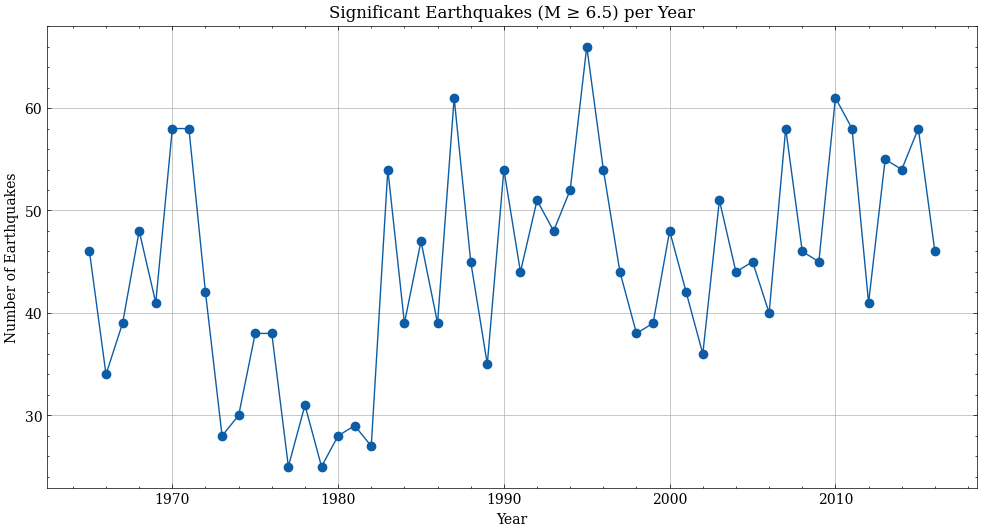

Cluster periods with above-average activity: [1970.0, 1971.0, 1987.0, 1995.0, 2007.0, 2010.0, 2011.0, 2013.0, 2015.0]


In [96]:
#Insight 3: Temporal Clustering of Large Earthquakes
# Extract year from datetime

# Count significant earthquakes (M ≥ 6.5) per year
significant = df[df['Magnitude'] >= 6.5].groupby('Year').size()

# Plot time series
plt.figure(figsize=(12, 6))
significant.plot(marker='o')
plt.title('Significant Earthquakes (M ≥ 6.5) per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

# Identify clusters
cluster_periods = significant[significant > significant.mean() + significant.std()]
print(f"Cluster periods with above-average activity: {cluster_periods.index.tolist()}")

### Result

The cluster periods of significant seismic activity are:


$\text{1970.0, 1971.0, 1987.0, 1995.0, 2007.0, 2010.0, 2011.0, 2013.0, 2015.0}$

# Cluster Periods of Significant Earthquake Activity

To identify years with unusually high numbers of significant earthquakes (magnitude \( M \geq 6.5 \)), we define a **cluster period** as a year in which the number of such earthquakes exceeds one standard deviation above the mean.

Let:

- $\N_y$: Number of earthquakes with \( M \geq 6.5 \) in year \( y \)
- $\mu$: Mean number of such earthquakes per year
- $\sigma$: Standard deviation of yearly counts

We define a cluster period as:

$\N_y > \mu + \sigma$

### Computation Summary

1. Extracted the year from each earthquake timestamp.
2. Filtered earthquakes where \( M \geq 6.5 \).
3. Counted the number of such earthquakes per year: \( N_y \).
4. Computed:


$\mu = \frac{1}{n} \sum_{y} N_y$ 

$\sigma = \sqrt{\frac{1}{n} \sum_{y} (N_y - \mu)^2}$




